In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

%matplotlib inline

# 연령별 - 지역 선호도 설문조사 분석

In [136]:
data = pd.read_csv('./data/travel_visit2.csv')

In [137]:
data

,통계분류(1),통계분류(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16
0,통계분류(1),통계분류(2),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,전체,소계,5.2,6.3,1.8,4.3,1.2,1.7,1.5,0.4,14.6,15.1,4.3,8.9,7.5,10,9.9,9.8,4.8
2,성별,남자,4.8,6.2,2,4.5,1.2,2,1.6,0.5,14.1,15.4,4.7,9.4,7.4,10.1,9.7,9.9,4.5
3,NaN,여자,5.5,6.4,1.7,4.2,1.2,1.4,1.4,0.3,15.1,14.9,3.9,8.4,7.6,9.9,10.2,9.8,5.2
4,연령,15~19세,9.4,6.9,2.5,5.9,1.7,2.6,1.9,0.1,13.7,12.9,3.3,6.5,7.1,9.6,8.1,8.7,3.2
5,NaN,20대,10.3,10.4,2.6,5,1.1,1.6,1.3,0.5,16.3,16.3,2.8,6.7,6.7,8.1,8.2,6.3,5.7
6,NaN,30대,5,6.7,2,4.5,1.2,2.1,1.6,0.5,16.5,17.6,3.5,9,6.2,8.9,9.2,8.4,5.5
7,NaN,40대,3.7,5.5,1.4,3.9,1,1.9,1.5,0.6,15.2,15.2,4.5,9.3,7.7,11.3,9.7,10.4,4
8,NaN,50대,2.9,4.9,1.3,3.9,1.3,1.6,1.1,0.3,12.3,14.7,5.7,9.1,8.4,10.8,11.5,12.2,5.6
9,NaN,60대,3.4,4.5,1.8,4.8,1.1,1,1.6,0.3,12.6,13.1,4.9,11.2,7.9,11.1,11.3,11.7,4.5


In [138]:
travel_age = data[4:9]

In [139]:
travel_age1 = travel_age.drop('통계분류(1)', axis =1)

In [140]:
travel_age1.columns = ['나이', '서울' , '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
travel_age1.index = ['10대','20대','30대','40대','50대']


In [141]:
travel_age1 = travel_age1.drop('나이',axis=1)

In [142]:
df = pd.DataFrame(travel_age1)

In [143]:
df

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
10대,9.4,6.9,2.5,5.9,1.7,2.6,1.9,0.1,13.7,12.9,3.3,6.5,7.1,9.6,8.1,8.7,3.2
20대,10.3,10.4,2.6,5,1.1,1.6,1.3,0.5,16.3,16.3,2.8,6.7,6.7,8.1,8.2,6.3,5.7
30대,5,6.7,2,4.5,1.2,2.1,1.6,0.5,16.5,17.6,3.5,9,6.2,8.9,9.2,8.4,5.5
40대,3.7,5.5,1.4,3.9,1,1.9,1.5,0.6,15.2,15.2,4.5,9.3,7.7,11.3,9.7,10.4,4
50대,2.9,4.9,1.3,3.9,1.3,1.6,1.1,0.3,12.3,14.7,5.7,9.1,8.4,10.8,11.5,12.2,5.6


In [304]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

<Figure size 1296x720 with 0 Axes>

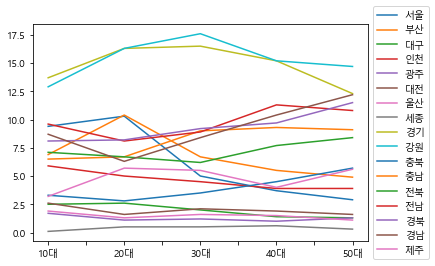

In [145]:
plt.figure(figsize = (18,10))
df.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()

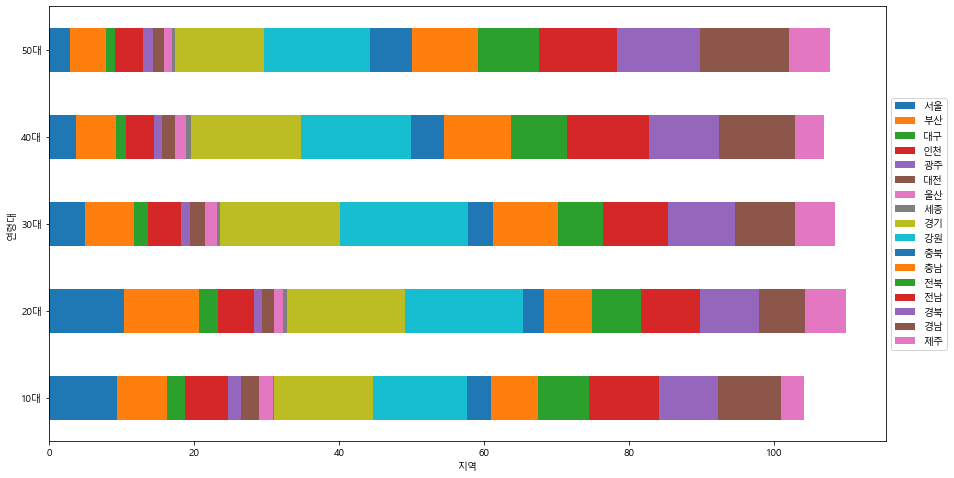

In [146]:
df.plot(kind='barh', figsize = (15,8), stacked=True)
plt.xlabel('지역')
plt.ylabel('연령대')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()

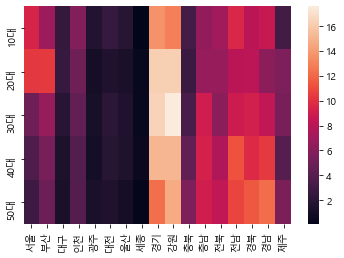

In [305]:
sns.heatmap(df)

# 연령별 - 여행지에서의 활동 설문조사 분석

In [346]:
data2 = pd.read_csv('./data/travel_activity1.csv')

In [347]:
data2

,통계분류(1),통계분류(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20
0,통계분류(1),통계분류(2),자연 및 풍경감상,음식관광,"야외 위락 및 스포츠, 레포츠 활동",역사 유적지 방문,"테마파크, 놀이시설, 동/식물원 방문",휴식/휴양,온천/스파,쇼핑,...,교육/체험 프로그램 참가,종교/성지순례,"카지노, 경마, 경륜 등",시티투어,드라마 촬영지 방문,유흥/오락,가족/친지/친구 방문,회의참가/시찰,교육/훈련/연수,기타
1,전체,소계,81,55,6,11,8.3,67.4,4.6,7.7,...,1.3,1.6,0.1,7.2,4.6,4,17.4,0.5,0.8,2.1
2,성별,남자,79.6,53.8,7.3,10.8,7.8,66.9,3.8,5.7,...,1.2,1.3,0.1,6.4,4.2,4.9,17,0.8,1,2.6
3,NaN,여자,82.3,56.3,4.7,11.2,8.8,67.9,5.4,9.7,...,1.4,1.8,0.1,7.9,5,3.1,17.7,0.2,0.7,1.6
4,연령,15~19세,75.4,48,5.4,11.2,8.7,59.5,1.8,8.6,...,2.6,1.9,-,6.7,5.4,4.1,16.7,-,0.9,2.3
5,NaN,20대,80.9,56.2,8.8,9.9,10.6,68.9,2.6,9.3,...,1,0.6,0.2,9,6.6,6.8,11.6,0.8,1.2,2
6,NaN,30대,80.3,54,7.1,10.4,10.8,68.3,5.1,7.8,...,1.3,0.7,0.1,6.5,4.3,4.1,16.8,0.3,1,1.3
7,NaN,40대,83.1,54,5.7,11.4,7.6,67.8,4.5,5.5,...,1.9,1.5,0.1,6.4,4.1,2.8,17.7,0.6,1,2.3
8,NaN,50대,81.7,58.8,5.4,11.4,6.3,67.1,5.1,9.3,...,0.9,1.9,0,8.4,3.7,3.7,17.4,0.3,0.6,2.3
9,NaN,60대,81.7,53.9,3.8,12.1,5.9,67.4,6.2,7,...,0.9,2.7,0.1,5.5,3.9,3,19.8,0.9,0.7,3


In [348]:
travel_activity = data2[4:9]

In [349]:
travel_activity

,통계분류(1),통계분류(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20
4,연령,15~19세,75.4,48,5.4,11.2,8.7,59.5,1.8,8.6,...,2.6,1.9,-,6.7,5.4,4.1,16.7,-,0.9,2.3
5,NaN,20대,80.9,56.2,8.8,9.9,10.6,68.9,2.6,9.3,...,1,0.6,0.2,9,6.6,6.8,11.6,0.8,1.2,2
6,NaN,30대,80.3,54,7.1,10.4,10.8,68.3,5.1,7.8,...,1.3,0.7,0.1,6.5,4.3,4.1,16.8,0.3,1,1.3
7,NaN,40대,83.1,54,5.7,11.4,7.6,67.8,4.5,5.5,...,1.9,1.5,0.1,6.4,4.1,2.8,17.7,0.6,1,2.3
8,NaN,50대,81.7,58.8,5.4,11.4,6.3,67.1,5.1,9.3,...,0.9,1.9,0,8.4,3.7,3.7,17.4,0.3,0.6,2.3


In [350]:
travel_activity = travel_activity.drop('통계분류(1)', axis =1)

In [351]:
travel_activity = travel_activity.drop('통계분류(2)', axis =1)

In [352]:
travel_activity.columns = ['자연 및 풍경감상','음식관광','야외 위락 및 스포츠, 레포츠 활동','역사 유적지 방문','테마파크, 놀이시설 동/식물원 방문','휴식/휴양','온천/스파','쇼핑','지역 문화예술/공연/전시시설 관람','스포츠 경기관람','지역 축제/이벤트 참가','교육/체험 프로그램 참가','종교/성지순례','카지노, 경마, 경륜 등','시티투어','드라마 촬영지 방문','유흥/오락','가족/친지/친구 방문','회의참가/시찰','교육/훈련/연수','기타']
travel_activity.index = ['10대','20대','30대','40대','50대']
                         

In [353]:
df1 = travel_activity.apply(pd.to_numeric, errors='coerce').fillna(0)

In [354]:
df1

,자연 및 풍경감상,음식관광,"야외 위락 및 스포츠, 레포츠 활동",역사 유적지 방문,"테마파크, 놀이시설 동/식물원 방문",휴식/휴양,온천/스파,쇼핑,지역 문화예술/공연/전시시설 관람,스포츠 경기관람,...,교육/체험 프로그램 참가,종교/성지순례,"카지노, 경마, 경륜 등",시티투어,드라마 촬영지 방문,유흥/오락,가족/친지/친구 방문,회의참가/시찰,교육/훈련/연수,기타
10대,75.4,48.0,5.4,11.2,8.7,59.5,1.8,8.6,4.6,0.0,...,2.6,1.9,0.0,6.7,5.4,4.1,16.7,0.0,0.9,2.3
20대,80.9,56.2,8.8,9.9,10.6,68.9,2.6,9.3,5.7,0.3,...,1.0,0.6,0.2,9.0,6.6,6.8,11.6,0.8,1.2,2.0
30대,80.3,54.0,7.1,10.4,10.8,68.3,5.1,7.8,4.5,0.3,...,1.3,0.7,0.1,6.5,4.3,4.1,16.8,0.3,1.0,1.3
40대,83.1,54.0,5.7,11.4,7.6,67.8,4.5,5.5,5.5,0.3,...,1.9,1.5,0.1,6.4,4.1,2.8,17.7,0.6,1.0,2.3
50대,81.7,58.8,5.4,11.4,6.3,67.1,5.1,9.3,4.7,0.5,...,0.9,1.9,0.0,8.4,3.7,3.7,17.4,0.3,0.6,2.3


<Figure size 1296x720 with 0 Axes>

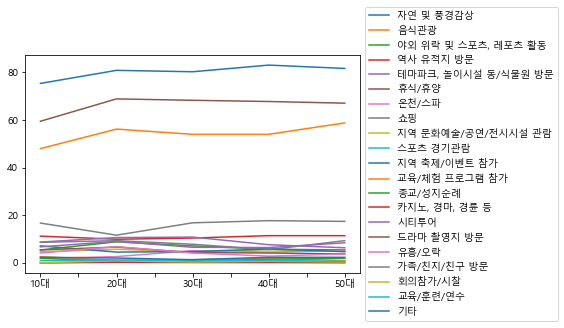

In [355]:
plt.figure(figsize = (18,10))
df1.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()

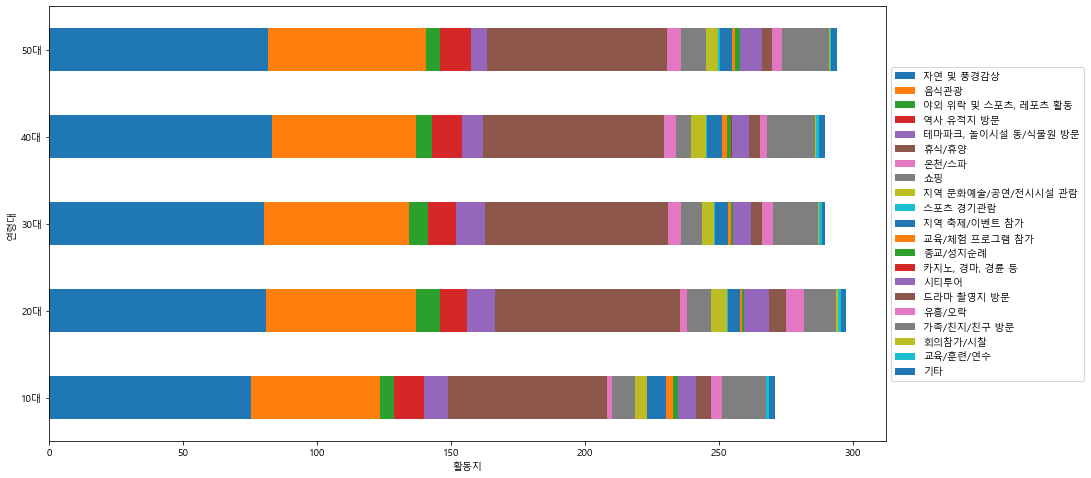

In [356]:
df1.plot(kind='barh', figsize = (15,8), stacked=True)
plt.xlabel('활동지')
plt.ylabel('연령대')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()



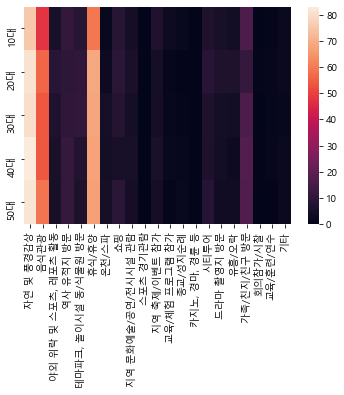

In [357]:
sns.heatmap(df1)

# 연령별 - 방문지 설문조사 분석

In [334]:
data3 = pd.read_csv('./data/travel_place_reason.csv')

In [335]:
data3

,통계분류(1),통계분류(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2019.12,2019.13,2019.14
0,통계분류(1),통계분류(2),여행지 지명도,볼거리 제공,저렴한 여행경비,이동 거리,여행할 수 있는 시간,숙박시설,쇼핑,음식,교통편,체험 프로그램 유무,경험자의 추천,관광지 편의시설,교육성,여행 동반자 유형,기타
1,전체,소계,20.4,18.9,4.5,8.1,10.2,5,0.7,6.5,2.7,0.9,7.1,2.7,0.7,9.2,2.2
2,성별,남자,20.2,18.2,4.3,9.1,9.8,4.9,0.6,6.5,3.1,0.8,7.1,2.9,0.7,9.2,2.6
3,NaN,여자,20.6,19.6,4.6,7.2,10.5,5.2,0.9,6.6,2.3,0.9,7.2,2.5,0.8,9.3,1.8
4,연령,15~19세,20.7,17.8,3.9,11.5,11.9,5.3,1.5,6.9,1.7,0.9,6.9,1.4,1.2,7.3,1.2
5,NaN,20대,22.8,21,5,7.8,8.9,3.3,0.8,5.5,3,1,7.2,3,0.3,7.3,3
6,NaN,30대,19.9,19.3,5.4,7.7,9.6,5.3,0.6,7,2.5,1,6.8,2.4,1.1,9.9,1.4
7,NaN,40대,18.3,19.9,4.3,7.8,11.1,6.2,0.8,6.3,2.7,1.3,6.1,3.3,1.1,8.6,2.1
8,NaN,50대,21.3,18.5,3.3,7.7,10.5,5.7,0.8,6.9,2.9,0.4,7.5,2.5,0.5,8.8,2.5
9,NaN,60대,18,17.2,4.4,9.3,10.3,4.3,0.4,7.7,2.1,0.4,7.7,2.8,0.5,12.2,2.6


In [336]:
travel_place_reason= data3[4:9]

In [337]:
travel_place_reason

,통계분류(1),통계분류(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2019.12,2019.13,2019.14
4,연령,15~19세,20.7,17.8,3.9,11.5,11.9,5.3,1.5,6.9,1.7,0.9,6.9,1.4,1.2,7.3,1.2
5,NaN,20대,22.8,21,5,7.8,8.9,3.3,0.8,5.5,3,1,7.2,3,0.3,7.3,3
6,NaN,30대,19.9,19.3,5.4,7.7,9.6,5.3,0.6,7,2.5,1,6.8,2.4,1.1,9.9,1.4
7,NaN,40대,18.3,19.9,4.3,7.8,11.1,6.2,0.8,6.3,2.7,1.3,6.1,3.3,1.1,8.6,2.1
8,NaN,50대,21.3,18.5,3.3,7.7,10.5,5.7,0.8,6.9,2.9,0.4,7.5,2.5,0.5,8.8,2.5


In [338]:
travel_place_reason = travel_place_reason.drop('통계분류(1)', axis =1)

In [339]:
travel_place_reason = travel_place_reason.drop('통계분류(2)', axis =1)

In [340]:
travel_place_reason.columns = ['여행지 지명도','볼거리 제공','저렴한 여행경비','이동 거리','여행할 수 있는 시간','숙박시설','쇼핑','음식','교통편','체험 프로그램 유무','경험자의 추천','관광지 편의시설','교육성','여행 동반자 유형','기타']
travel_place_reason.index = ['10대','20대','30대','40대','50대']

In [341]:
df3 = travel_place_reason.apply(pd.to_numeric, errors='coerce').fillna(0)

In [342]:
df3

,여행지 지명도,볼거리 제공,저렴한 여행경비,이동 거리,여행할 수 있는 시간,숙박시설,쇼핑,음식,교통편,체험 프로그램 유무,경험자의 추천,관광지 편의시설,교육성,여행 동반자 유형,기타
10대,20.7,17.8,3.9,11.5,11.9,5.3,1.5,6.9,1.7,0.9,6.9,1.4,1.2,7.3,1.2
20대,22.8,21.0,5.0,7.8,8.9,3.3,0.8,5.5,3.0,1.0,7.2,3.0,0.3,7.3,3.0
30대,19.9,19.3,5.4,7.7,9.6,5.3,0.6,7.0,2.5,1.0,6.8,2.4,1.1,9.9,1.4
40대,18.3,19.9,4.3,7.8,11.1,6.2,0.8,6.3,2.7,1.3,6.1,3.3,1.1,8.6,2.1
50대,21.3,18.5,3.3,7.7,10.5,5.7,0.8,6.9,2.9,0.4,7.5,2.5,0.5,8.8,2.5


<Figure size 1296x720 with 0 Axes>

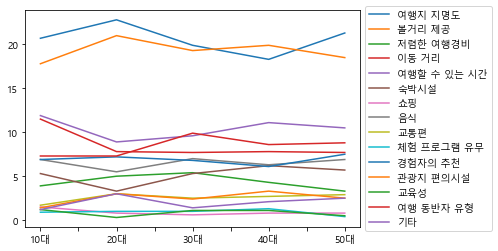

In [343]:
plt.figure(figsize = (18,10))
df3.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()


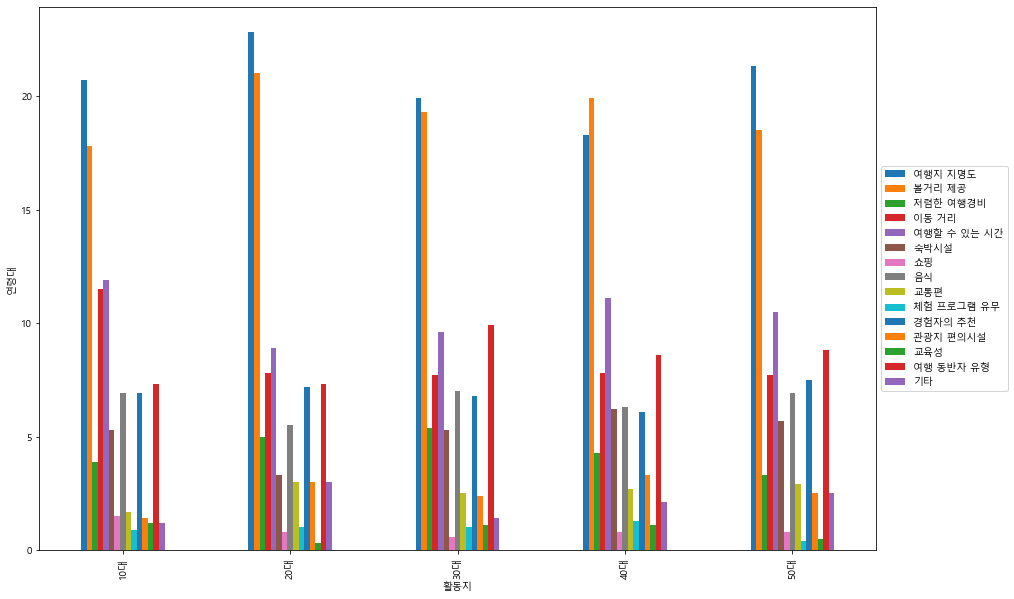

In [344]:
df3.plot(kind='bar', figsize = (15,10), stacked=False)
plt.xlabel('활동지')
plt.ylabel('연령대')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()


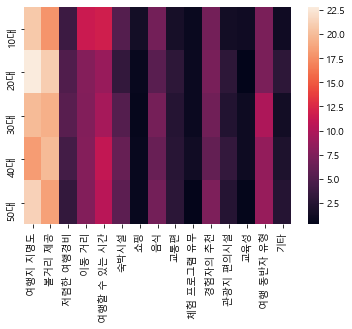

In [345]:
sns.heatmap(df3)

# 연령과 여행 요일 관계파악

In [254]:
df4 = pd.read_csv('./data/travel_time.csv')

In [256]:
travel_time = df4[4:9]

In [259]:
travel_time = travel_time.drop('통계분류(1)', axis =1)
travel_time = travel_time.drop('통계분류(2)', axis =1)

In [263]:
travel_time.columns = ['평일','주말','명절연휴','공휴일']
travel_time.index = ['10대','20대','30대','40대','50대']

In [276]:
df4 = travel_time.apply(pd.to_numeric, errors='coerce').fillna(0)

In [278]:
df4

,평일,주말,명절연휴,공휴일
10대,34.6,71.4,7.1,7.5
20대,32.1,79.8,6.2,9.0
30대,31.4,80.0,7.1,8.3
40대,30.1,80.6,7.3,6.1
50대,31.5,79.5,6.5,5.1


<Figure size 1296x720 with 0 Axes>

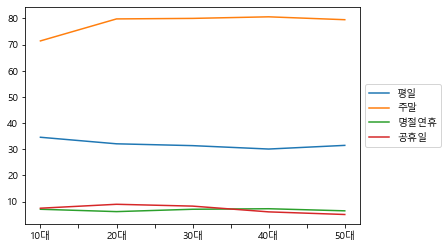

In [277]:
plt.figure(figsize = (18,10))
df4.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()


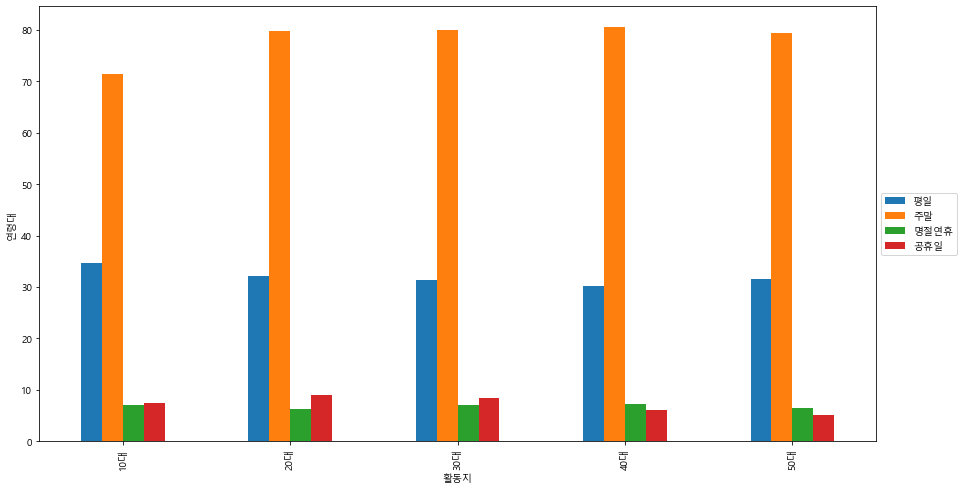

In [280]:
df4.plot(kind='bar', figsize = (15,8), stacked=False)
plt.xlabel('활동지')
plt.ylabel('연령대')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()


In [284]:
travel_activity.to_csv('./나이-활동.xlsx')

In [291]:
travel_age1.to_csv('./나이-지역1.csv')

In [288]:
travel_place_reason.to_csv('./나이-여행이유.csv')

In [290]:
travel_time.to_csv('./나이-요일.csv')